In [9]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

In [6]:
def get_team_schedule_and_results(team_abbrev: str, year: int, save: bool = True) -> pd.DataFrame:
    tables = pd.read_html(f"https://www.pro-football-reference.com/teams/{team_abbrev}/{year}.htm")
    sched_results_table = tables[1]
    sched_results_table["team_abbrev"] = team_abbrev
    sched_results_table["season"] = year
    if save:
        sched_results_table.to_csv(f"{year}_{team_abbrev}_schedule_results.csv")
    return sched_results_table

# Get Phi Data

In [7]:
phi2017 = get_team_schedule_and_results("phi", 2017)
phi2022 = get_team_schedule_and_results("phi", 2022)

# phi2017 = pd.read_csv("2017_phi_schedule_results_csv")
# phi2022 = pd.read_csv("2022_phi_schedule_results_csv")

HTTPError: HTTP Error 429: Too Many Requests

In [100]:
# Analyze Only Weeks 1-8
phi2017 = phi2017[:8]
phi2022 = phi2022[:8]

In [111]:
phi2022

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                Week                Day               Date Unnamed: 3_level_1   
0                  1                Sun       September 11          1:00PM ET   
1                  2                Mon       September 19          8:30PM ET   
2                  3                Sun       September 25          1:00PM ET   
3                  4                Sun          October 2          1:00PM ET   
4                  5                Sun          October 9          4:25PM ET   
5                  6                Sun         October 16          8:20PM ET   
6                  7                NaN                NaN                NaN   
7                  8                Sun         October 30          1:00PM ET   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Unnamed: 7_level_0  \
  Unnamed: 4_level_1 Unnamed: 5_level_1                 OT                Rec   
0           boxscore                  W                NaN                1-0   
1           boxscore                  W                NaN                2-0   
2           boxscore                  W                NaN                3-0   
3           boxscore                  W                NaN                4-0   
4           boxscore                  W                NaN                5-0   
5           boxscore                  W                NaN                6-0   
6                NaN                NaN                NaN                NaN   
7           boxscore                  W                NaN                7-0   

  Unnamed: 8_level_0     Unnamed: 9_level_0  ... Offense Defense         \
  Unnamed: 8_level_1                    Opp  ...      TO    1stD  TotYd   
0                  @          Detroit Lions  ...     NaN    23.0  386.0   
1                NaN      Minnesota Vikings  ...     1.0    20.0  264.0   
2                  @  Washington Commanders  ...     NaN    20.0  240.0   
3                NaN   Jacksonville Jaguars  ...     1.0    13.0  219.0   
4                  @      Arizona Cardinals  ...     NaN    23.0  363.0   
5                NaN         Dallas Cowboys  ...     NaN    21.0  315.0   
6                NaN               Bye Week  ...     NaN     NaN    NaN   
7                NaN    Pittsburgh Steelers  ...     NaN    21.0  302.0   

                     Expected Points                 season  
   PassY  RushY   TO         Offense Defense Sp. Tms         
0  205.0  181.0  1.0           21.15  -15.67   -0.78   2022  
1  202.0   62.0  3.0           14.26    7.86   -7.37   2022  
2  153.0   87.0  1.0            9.65   18.29   -8.92   2022  
3  148.0   71.0  5.0           -0.18   11.06   -1.97   2022  
4  239.0  124.0  1.0           10.63  -12.33    5.16   2022  
5  181.0  134.0  3.0            7.95    0.04    3.76   2022  
6    NaN    NaN  NaN             NaN     NaN     NaN   2022  
7  158.0  144.0  2.0           23.31    4.96   -2.01   2022  

[8 rows x 26 columns]

# Compare 2022 to 2017 team

In [148]:
phi2017[('Unnamed: 0_level_0', 'Week')].tolist()

['1', '2', '3', '4', '5', '6', '7', '8']

In [149]:
def get_comparison_figure(df1: pd.DataFrame, df2: pd.DataFrame, col, col_overwrite_name) -> go.Figure:
    """Returns a bare-bones scatter plot comparing the cumulative metric in each of the two DFs passed. 
    
    Note: To update the layout of the figure, use the ".update_layout" method on the returned object. 
    See plotly docs for more details: https://plotly.com/python/reference/layout/ 
    """
    
    df1_season = df1["season"][0]
    df2_season = df2["season"][0]
    
    comparison_df = pd.DataFrame({
        "Week": df1[('Unnamed: 0_level_0', 'Week')].tolist(),
        df1_season: df1[col].cumsum(),
        df2_season: df2[col].cumsum()
    })
    comparison_df = cumulative_rushing_yards.melt(id_vars=["Week"], var_name="Team", value_name = col_overwrite_name)

    
    return px.scatter(
        comparison_df,
        x = "Week",
        y = col_overwrite_name,
        color = "Team"
    )

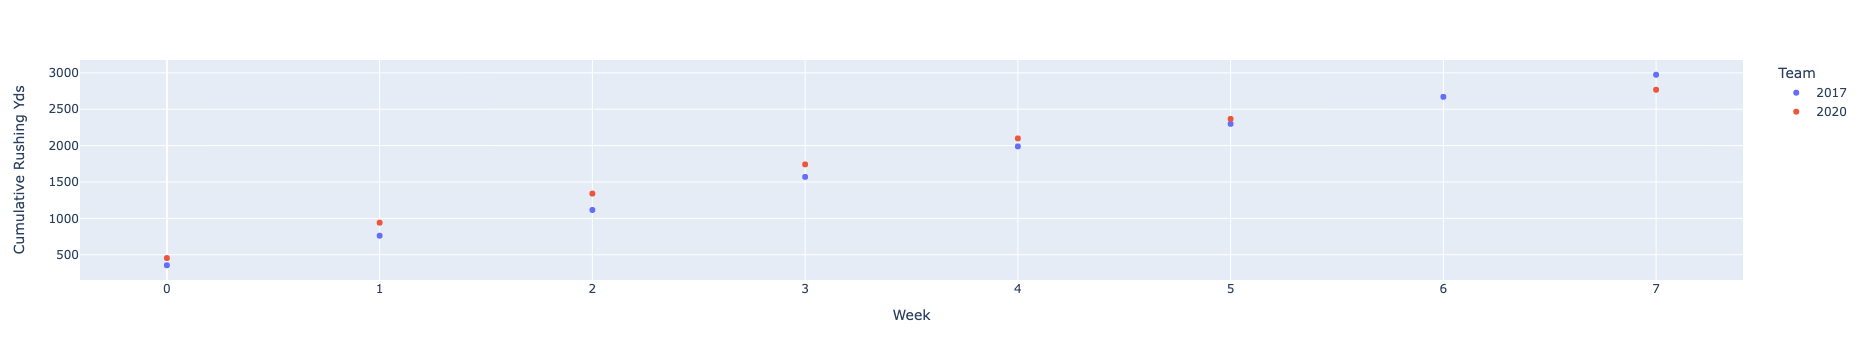

In [150]:
fig = get_comparison_figure(phi2017, phi2022, ("Offense", "RushY"), "Cumulative Rushing Yds")
fig.show()

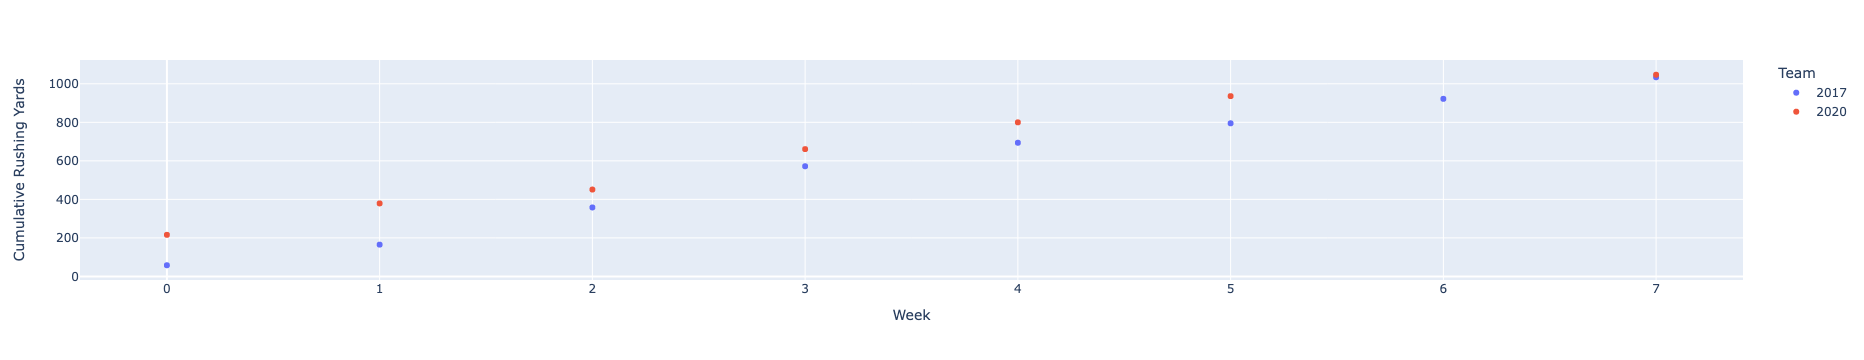

In [101]:
cumulative_rushing_yards = pd.DataFrame(
    {
        "Week": range(0, len(phi2017)),
        "2017": phi2017[("Offense", "RushY")].cumsum(),
        "2020": phi2022[("Offense", "RushY")].cumsum()
    }
)

fig = px.scatter(
    cumulative_rushing_yards.melt(id_vars=["Week"], var_name="Team", value_name = "Cumulative Rushing Yards"),
    x = "Week",
    y = "Cumulative Rushing Yards",
    color = "Team"
)

fig.show()

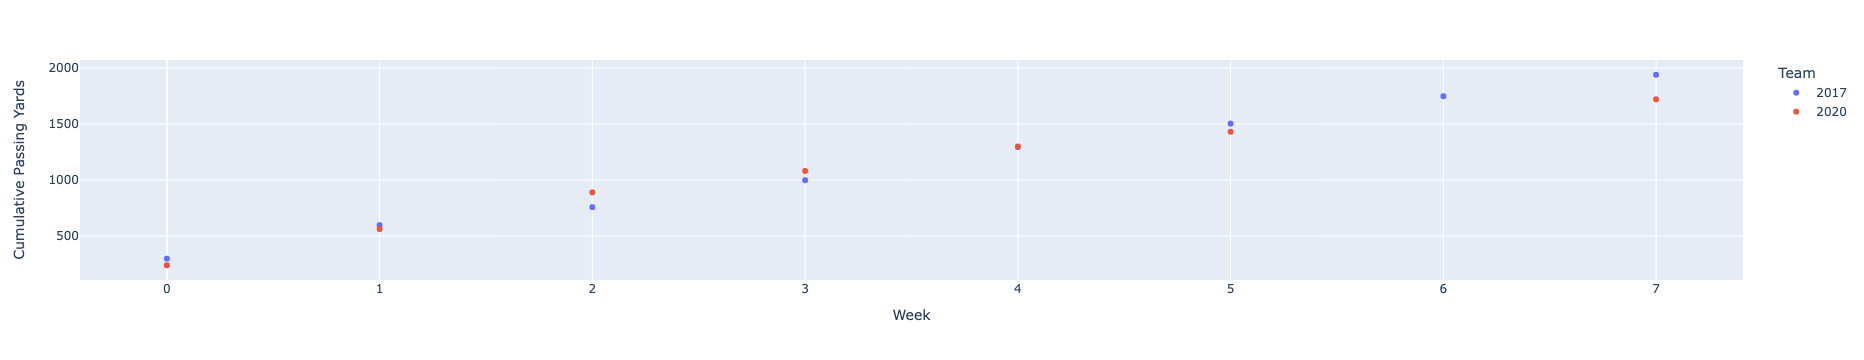

In [102]:
cumulative_rushing_yards = pd.DataFrame(
    {
        "Week": range(0, len(phi2017)),
        "2017": phi2017[("Offense", "PassY")].cumsum(),
        "2020": phi2022[("Offense", "PassY")].cumsum()
    }
)

fig = px.scatter(
    cumulative_rushing_yards.melt(id_vars=["Week"], var_name="Team", value_name = "Cumulative Passing Yards"),
    x = "Week",
    y = "Cumulative Passing Yards",
    color = "Team"
)

fig.show()

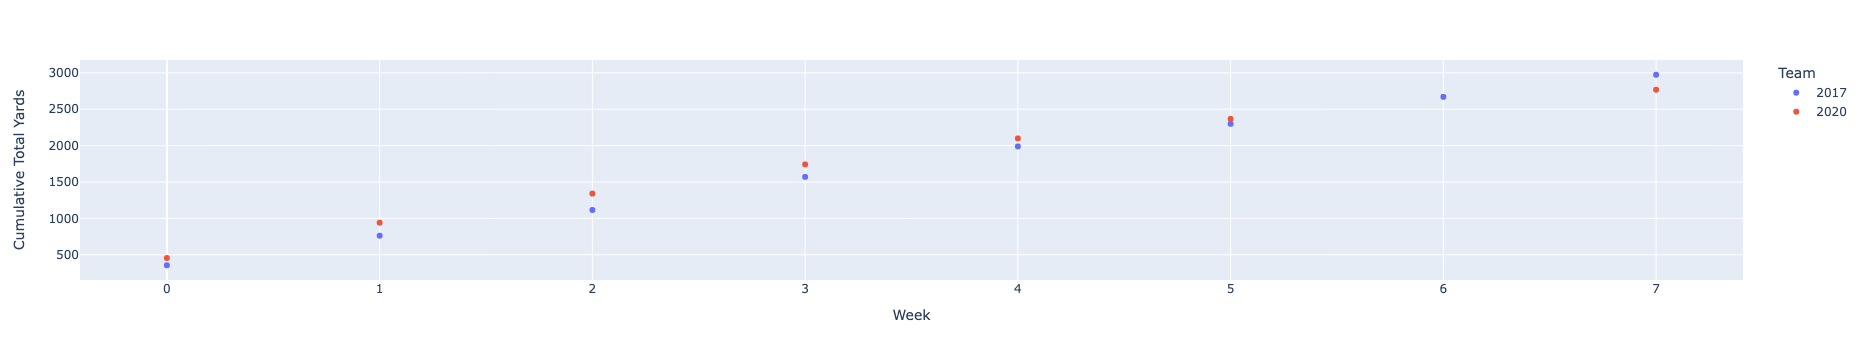

In [103]:
cumulative_rushing_yards = pd.DataFrame(
    {
        "Week": range(0, len(phi2017)),
        "2017": phi2017[("Offense", "TotYd")].cumsum(),
        "2020": phi2022[("Offense", "TotYd")].cumsum()
    }
)

fig = px.scatter(
    cumulative_rushing_yards.melt(id_vars=["Week"], var_name="Team", value_name = "Cumulative Total Yards"),
    x = "Week",
    y = "Cumulative Total Yards",
    color = "Team"
)

fig.show()

In [104]:
# TODO - project total yards by adding predicting rushing yards + predicted passing yards

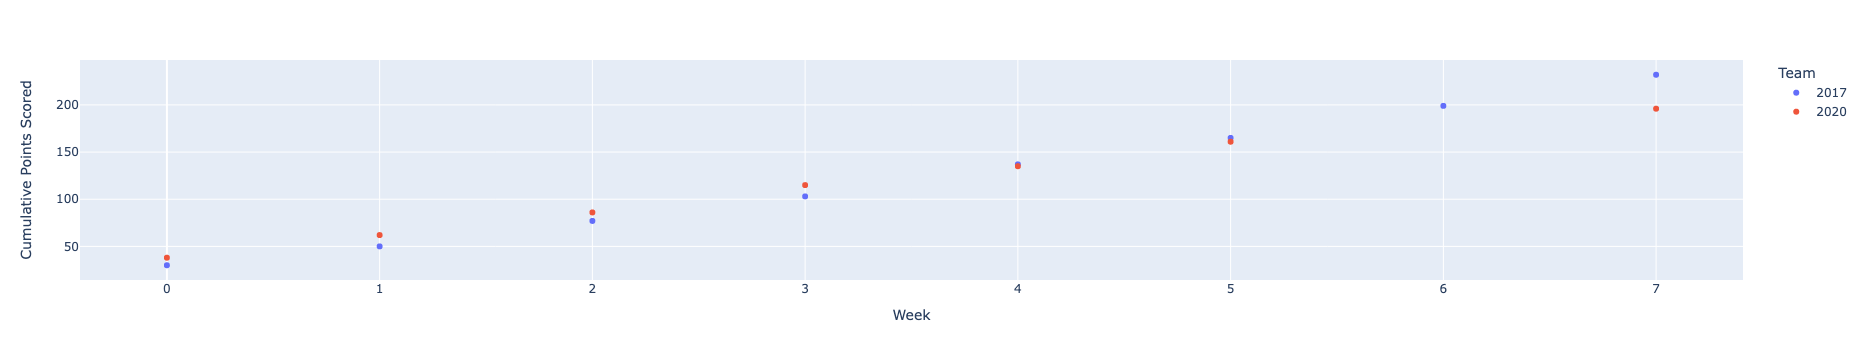

In [105]:
comparison_df = pd.DataFrame(
    {
        "Week": range(0, len(phi2017)),
        "2017": phi2017[("Score", "Tm")].cumsum(),
        "2020": phi2022[("Score", "Tm")].cumsum()
    }
)
comparison_df = comparison_df.melt(id_vars=["Week"], var_name="Team", value_name = "Cumulative Points Scored")

fig = px.scatter(
    comparison_df,
    x = "Week",
    y = "Cumulative Points Scored",
    color = "Team"
)
fig.show()

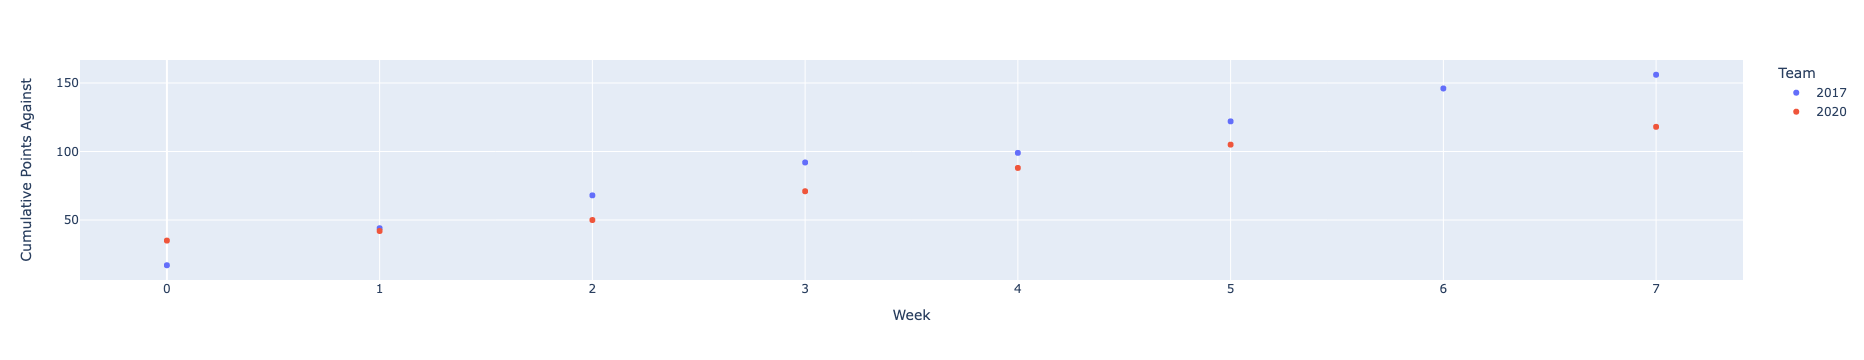

In [106]:
comparison_df = pd.DataFrame(
    {
        "Week": range(0, len(phi2017)),
        "2017": phi2017[("Score", "Opp")].cumsum(),
        "2020": phi2022[("Score", "Opp")].cumsum()
    }
)
comparison_df = comparison_df.melt(id_vars=["Week"], var_name="Team", value_name = "Cumulative Points Against")

fig = px.scatter(
    comparison_df,
    x = "Week",
    y = "Cumulative Points Against",
    color = "Team"
)
fig.show()

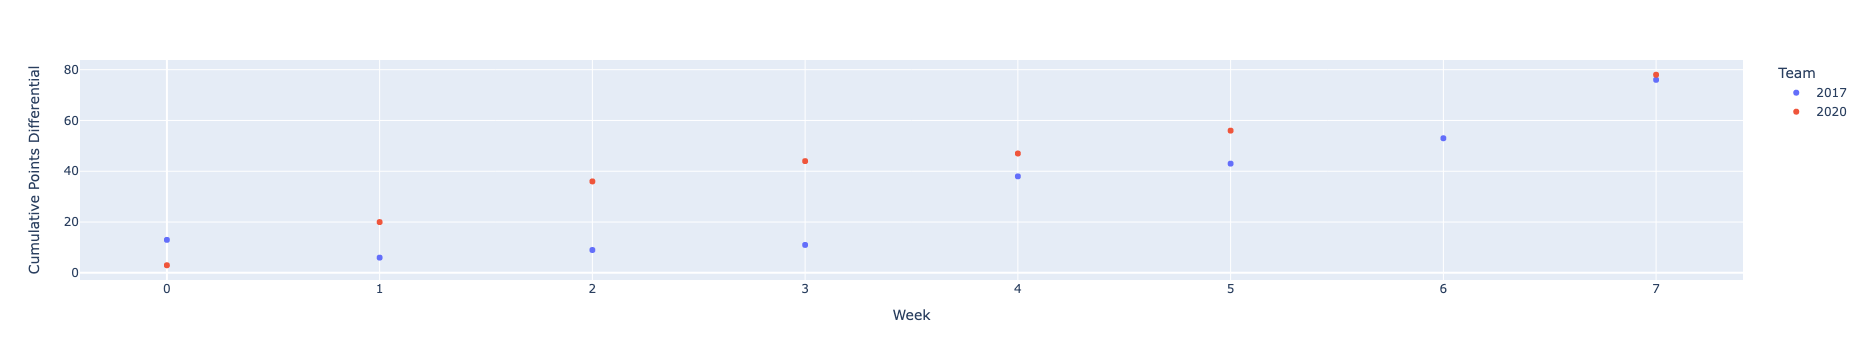

In [107]:
comparison_df = pd.DataFrame(
    {
        "Week": range(0, len(phi2017)),
        "2017": (phi2017[("Score", "Tm")] - phi2017[("Score", "Opp")]).cumsum(),
        "2020": (phi2022[("Score", "Tm")] - phi2022[("Score", "Opp")]).cumsum(),
    }
)
comparison_df = comparison_df.melt(id_vars=["Week"], var_name="Team", value_name = "Cumulative Points Differential")

fig = px.scatter(
    comparison_df,
    x = "Week",
    y = "Cumulative Points Differential",
    color = "Team"
)
fig.show()

In [10]:
team_abbrevs = [
    "chi", 
    "atl", 
    "rav",
    "jax",
    "cle",
    "nyg",
    "sea",
    "phi",
    "car", 
    "nor",
    "oti",
    "gnb",
    "det",
    "nwe",
    "crd",
    "dal",
    "nyj",
    "buf",
    "was",
    "sfo",
    "cin",
    "rai",
    "den",
    "kan",
    "min",
    "ntx",
    "mia",
    "clt",
    "pit",
    "sdg",
    "ram",
    "tam",
]

import time 

def get_all_teams_schedule_and_results(year: int, save: bool = True) -> pd.DataFrame:    
    all_teams = pd.DataFrame()
    for abbr in team_abbrevs:
            
        # FIXME
        time.sleep(60)
        
        tables = get_team_schedule_and_results(abbr, year)
        team_df = tables[1]
        all_teams = pd.concat([all_teams, team_df])
        
    if save:
        all_teams.to_csv(f"{year}_all_teams_schedule_and_results.csv")
    
    return all_teams

teams2022 = get_all_teams_schedule_and_results(2022)
teams2017 = get_all_teams_schedule_and_results(2017)

KeyboardInterrupt: 

In [8]:
teams2017

NameError: name 'teams2017' is not defined